# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/2D/Comparison/'
X,y = DS.LoadData('Spiral')

# Applying T-SNE

In [4]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

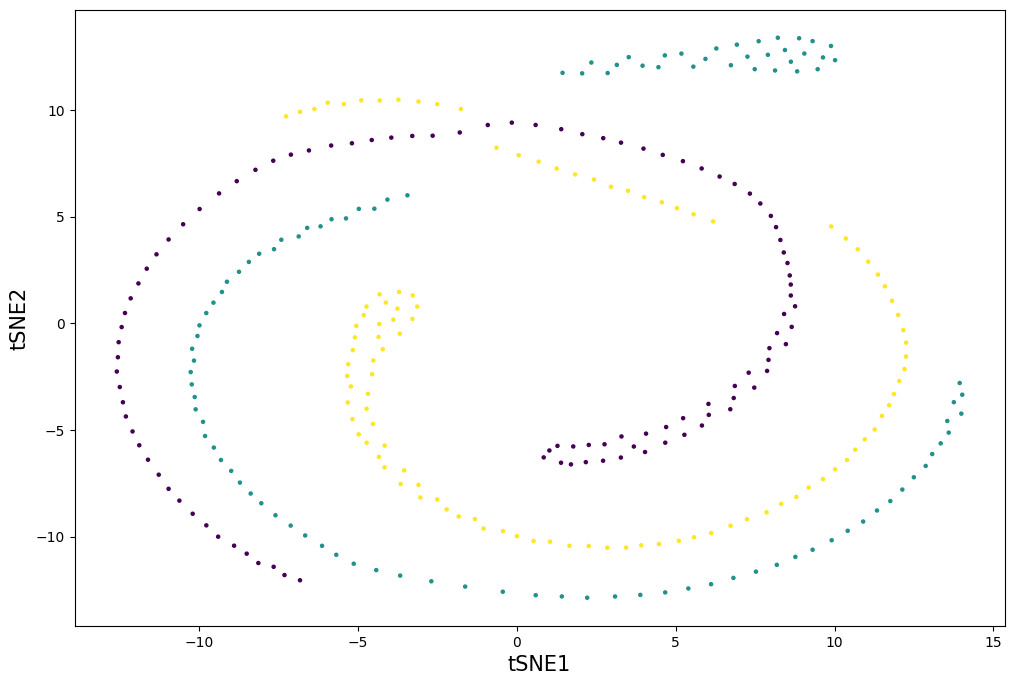

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Spiral_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [6]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

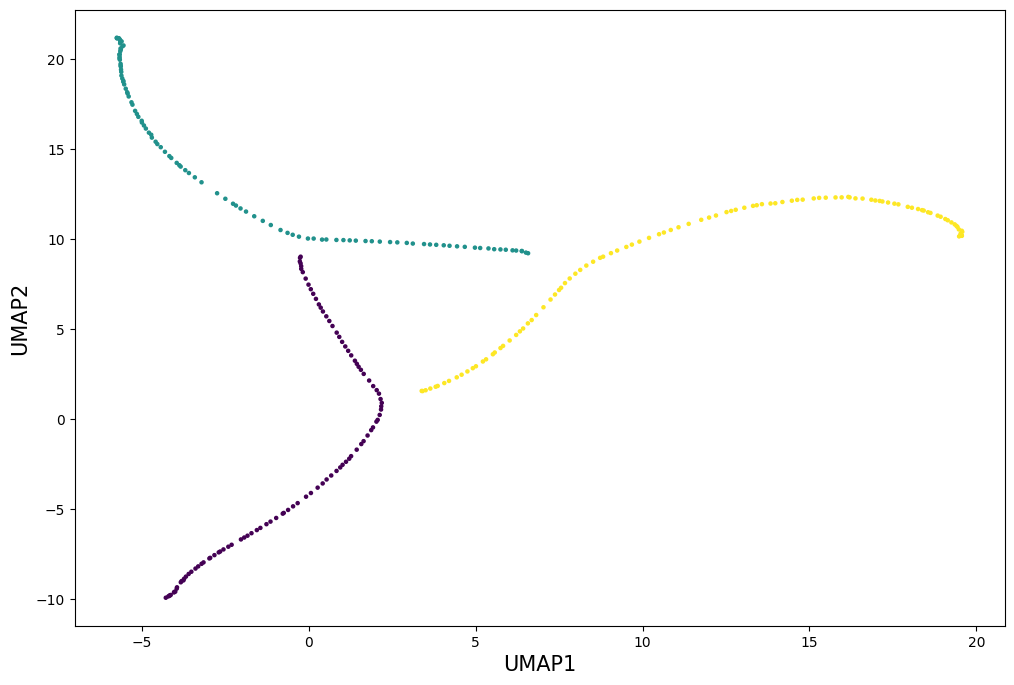

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Spiral_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [8]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [9]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.968698,-0.092842
1,0.969077,-0.104924
2,0.968881,-0.087172
3,0.968844,-0.071583
4,0.965648,-0.113332
5,0.969406,-0.081063
6,0.969164,-0.074034
7,0.758700,-0.111002
8,0.865899,-0.095602
9,0.885831,-0.080309


# Projecting data into high dimension and applying NeuroDAVIS
Using projection: $(x,y) \rightarrow (x+y,x-y,xy,x^2,y^2,x^2y,xy^2,x^3,y^3)$

In [10]:
from D2toD9 import Convert
X_9D = Convert(X)

# Applying T-SNE

In [11]:
X_tsne = Md.UseMethod('TSNE', X_9D)

# Plotting the results

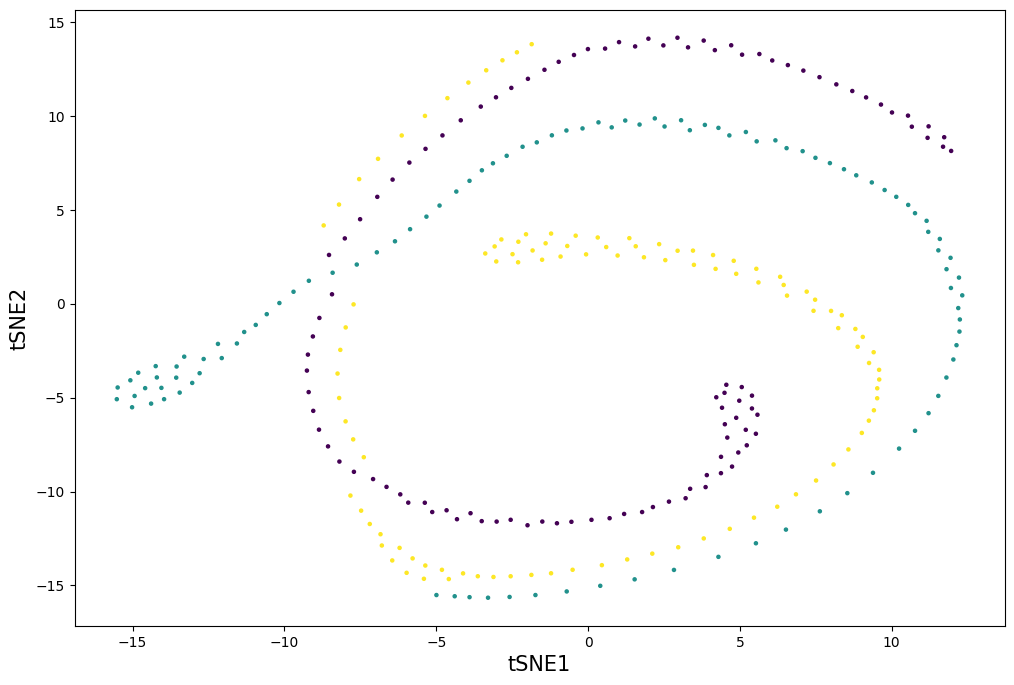

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=5)
plt.xlabel("tSNE1", fontsize = 15)
plt.ylabel("tSNE2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Spiral_tSNE_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [13]:
X_umap = Md.UseMethod('UMAP', X_9D)

# Plotting the results

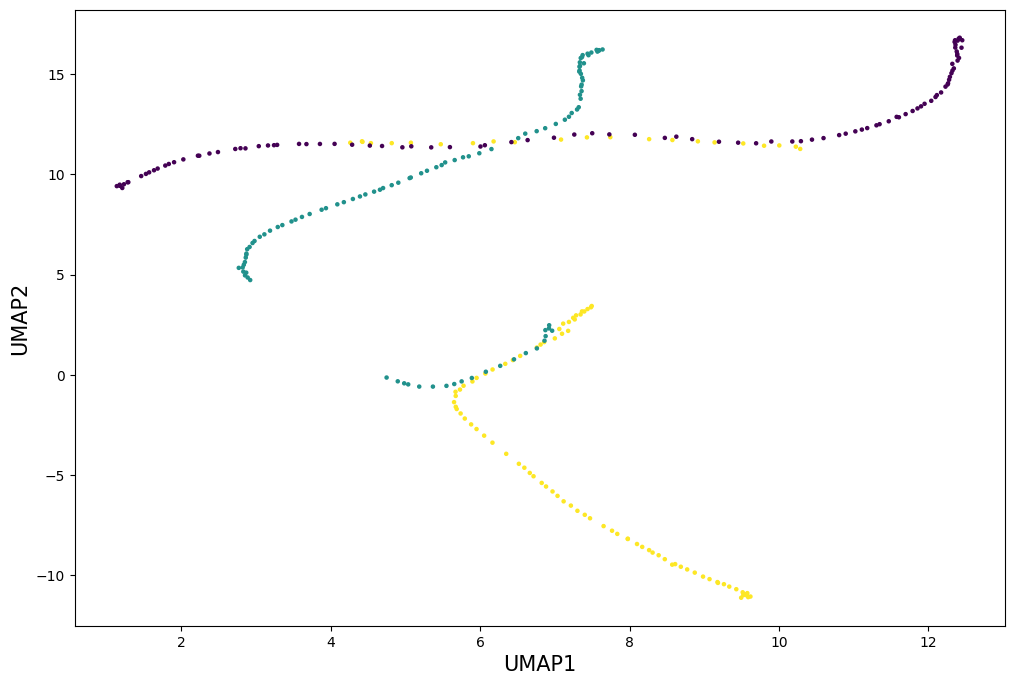

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,s=5)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
#plt.show()
plt.savefig(dir+'Spiral_UMAP_2D_9D_2D.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [15]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X_9D, X_9D)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [16]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['tSNE','UMAP'])
result

,tSNE,UMAP
0,0.752501,-0.070556
1,0.677917,-0.104431
2,0.753303,-0.084753
3,0.753158,-0.067500
4,0.750650,-0.078249
5,0.745499,-0.016571
6,0.634135,-0.072151
7,0.753368,-0.079474
8,0.752877,-0.023846
9,0.753171,-0.104489
